In [1]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
folder_path = 'test-transcripts/'

# read text files
def load_documents(folder_path):
    documents = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                documents.append(file.read())
    return documents

documents = load_documents(folder_path)

# set stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = ['like', 'yeah', 'know', 'um', 'uh', 'really', 'one', 'go']
broad_terms = ['philippines', 'filipino']
stop_words.update(custom_stop_words, broad_terms)

lemmatizer = WordNetLemmatizer()

def preprocess_text(doc):
    tokens = word_tokenize(doc.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

preprocessed_docs = [preprocess_text(doc) for doc in documents]

In [17]:
dictionary = corpora.Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15, random_state=42, alpha='auto', per_word_topics=True)

In [18]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.000*"music" + 0.000*"right" + 0.000*"guy" + 0.000*"good" + 0.000*"year" + 0.000*"oh" + 0.000*"going" + 0.000*"time" + 0.000*"get" + 0.000*"people"
Topic 1: 0.016*"video" + 0.008*"think" + 0.008*"music" + 0.008*"see" + 0.007*"filipino" + 0.007*"say" + 0.007*"okay" + 0.006*"people" + 0.006*"also" + 0.005*"guy"
Topic 2: 0.007*"tourism" + 0.006*"say" + 0.006*"local" + 0.006*"protocol" + 0.006*"video" + 0.005*"travel" + 0.005*"new" + 0.004*"government" + 0.003*"young" + 0.003*"domestic"
Topic 3: 0.009*"guy" + 0.009*"get" + 0.009*"people" + 0.008*"going" + 0.008*"oh" + 0.008*"got" + 0.008*"right" + 0.007*"okay" + 0.007*"thing" + 0.006*"time"
Topic 4: 0.018*"let" + 0.018*"add" + 0.012*"use" + 0.010*"nurse" + 0.009*"sauce" + 0.009*"pork" + 0.009*"cook" + 0.009*"ingredient" + 0.009*"make" + 0.007*"onion"
Topic 5: 0.018*"guy" + 0.014*"going" + 0.012*"na" + 0.011*"gon" + 0.011*"okay" + 0.011*"good" + 0.010*"music" + 0.010*"oh" + 0.009*"got" + 0.009*"put"
Topic 6: 0.011*"oh" + 0.009*"mu

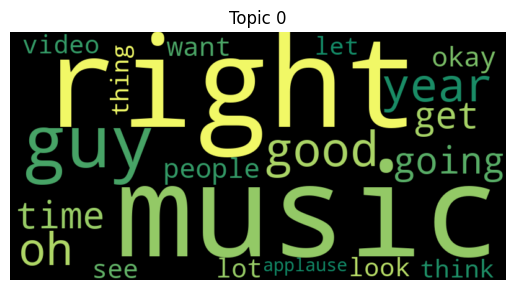

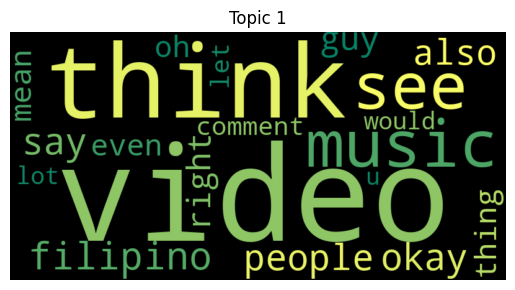

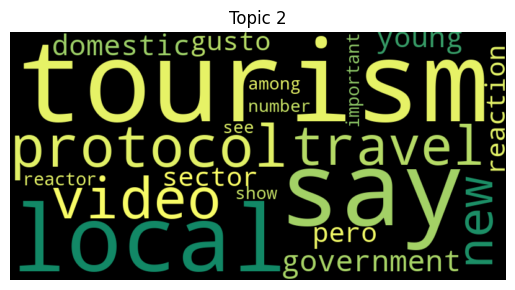

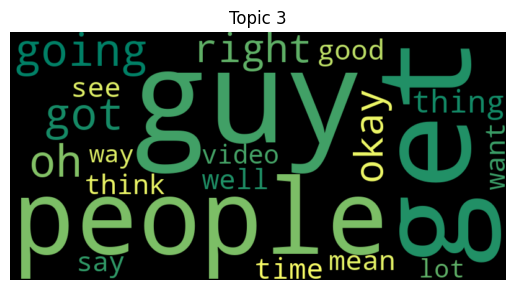

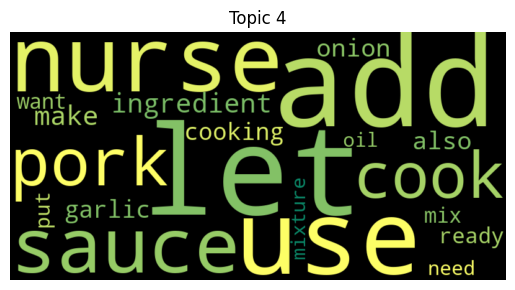

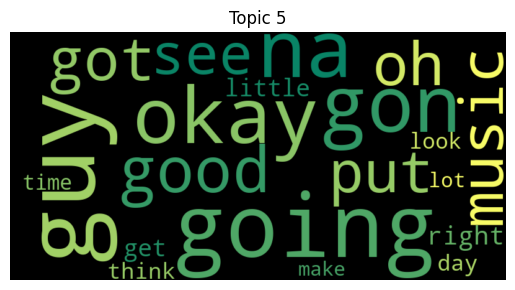

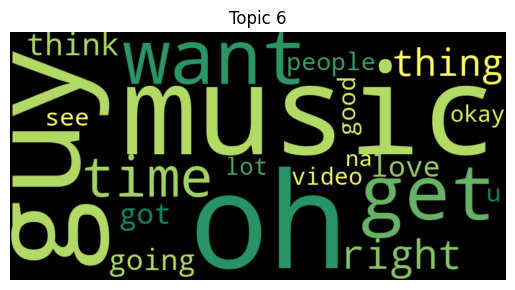

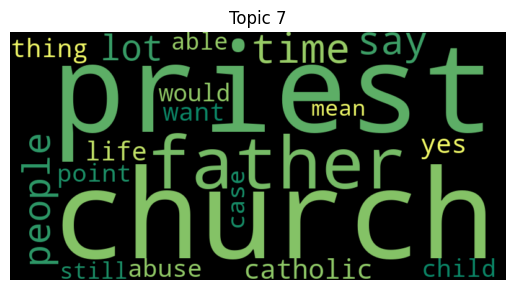

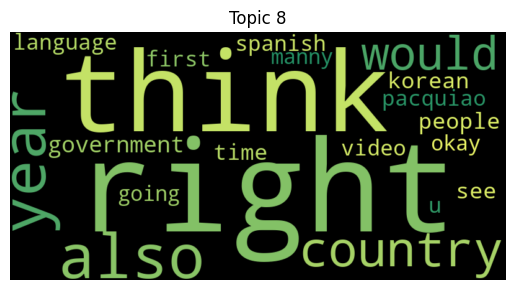

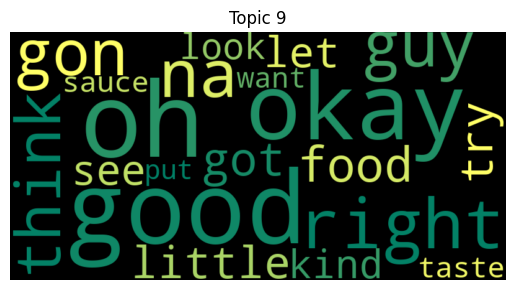

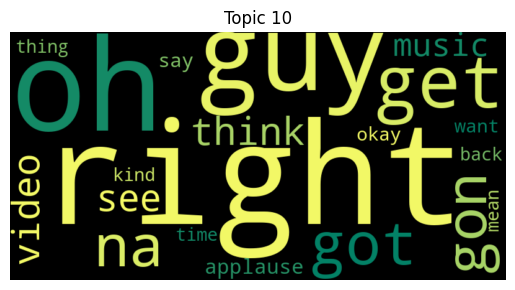

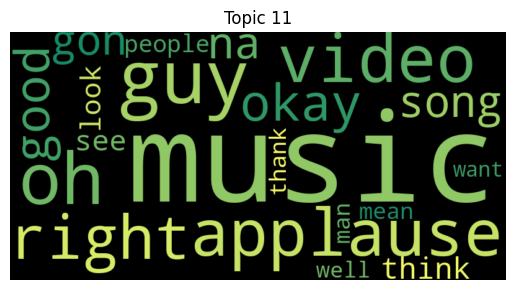

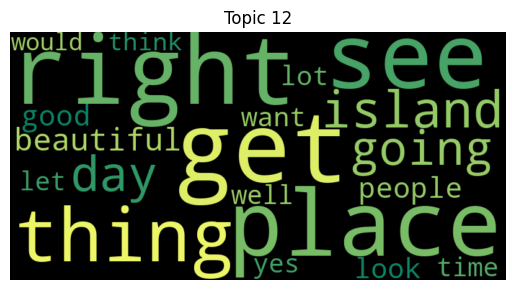

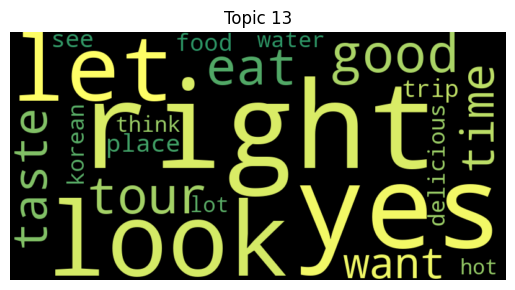

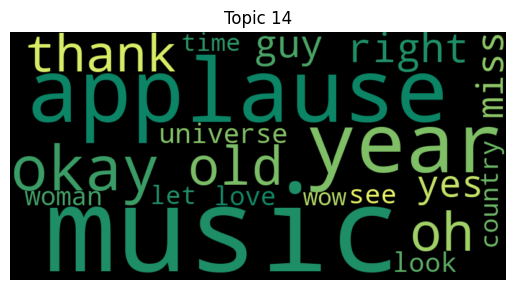

In [21]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

for topic_id in range(lda_model.num_topics):
    words = dict(lda_model.show_topic(topic_id, 20))
    wordcloud = WordCloud(width=800, height=400, colormap='summer').generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_id}")
    plt.show()

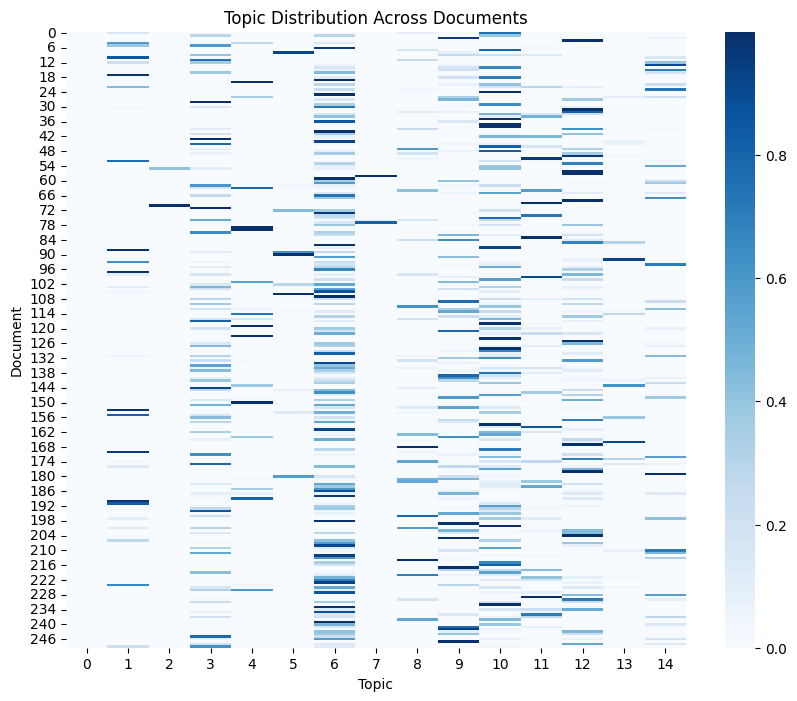

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matrix of topic probabilities
topic_dist_matrix = np.zeros((len(corpus), lda_model.num_topics))

for i, doc_bow in enumerate(corpus):
    for topic_id, prob in lda_model.get_document_topics(doc_bow):
        topic_dist_matrix[i][topic_id] = prob

# Plot heatmap of topic distributions across documents
plt.figure(figsize=(10, 8))
sns.heatmap(topic_dist_matrix, cmap="Blues", cbar=True)
plt.title("Topic Distribution Across Documents")
plt.xlabel("Topic")
plt.ylabel("Document")
plt.show()